In [2]:
import pathlib

from src.dataset import Dataset
from src.entry_condition import A, DateInterval, MoodInterval, NoteContains, register

# TODO: add dummy data if the real file is missing
path = next(pathlib.Path("other", "daylio-data").glob("*.csv"))
print(f"using file: {path.name} ({path.stat().st_size * 2**-20:.3f} Mb)\n")

df = Dataset(path)
print(df.stats())

register(set(df.activities()))


using file: daylio_export_2025_03_11.csv (0.024 Mb)

Dataset(76 entries; last [2 hours 34 minutes 18 seconds ago]; mood: 3.934 ± 0.943)
Stats(
    - mood: 3.934 ± 0.943
    - note length: 200.987 ± 264.824 symbols
    - number of activities: 498
    - entries frequency: 0.937 entries per day (once every 1 day 1 hour 37 minutes)
)


# API

### `.head`

Use the `.head` method to look at the latest entries of the dataset

In [3]:
df.head()

Dataset(76 entries; last [2 hours 34 minutes 18 seconds ago]; mood: 3.934 ± 0.943)
[11.03.2025 21:33] 5.0 No fap, appreciate, cleaning, eat healthy, go outside, good sleep, make list, movies & tv, no social media, start late (10am or later), take a break, time together, work day
[01.03.2025 20:00] 4.0 Boardgames with GF, Youtube, doomscrolling, medium sleep, time together
[25.02.2025 23:33] 3.0 No fap, Youtube, doomscrolling, gaming, go outside, good sleep, listen to music, time together, work day
[23.02.2025 23:37] 5.0 No fap, biking, cleaning, day off, eat healthy, gaming, go outside, good sleep, sauna, swimming, time together
[22.02.2025 11:29] 5.0 No fap, biking, cleaning, date, day off, good sleep, swimming, time together
    and 71 more entries...


In [4]:
df.head(2)

Dataset(76 entries; last [2 hours 34 minutes 18 seconds ago]; mood: 3.934 ± 0.943)
[11.03.2025 21:33] 5.0 No fap, appreciate, cleaning, eat healthy, go outside, good sleep, make list, movies & tv, no social media, start late (10am or later), take a break, time together, work day
[01.03.2025 20:00] 4.0 Boardgames with GF, Youtube, doomscrolling, medium sleep, time together
    and 74 more entries...


In [5]:
# prints all entries
df.head(-1)

Dataset(76 entries; last [2 hours 34 minutes 18 seconds ago]; mood: 3.934 ± 0.943)
[11.03.2025 21:33] 5.0 No fap, appreciate, cleaning, eat healthy, go outside, good sleep, make list, movies & tv, no social media, start late (10am or later), take a break, time together, work day
[01.03.2025 20:00] 4.0 Boardgames with GF, Youtube, doomscrolling, medium sleep, time together
[25.02.2025 23:33] 3.0 No fap, Youtube, doomscrolling, gaming, go outside, good sleep, listen to music, time together, work day
[23.02.2025 23:37] 5.0 No fap, biking, cleaning, day off, eat healthy, gaming, go outside, good sleep, sauna, swimming, time together
[22.02.2025 11:29] 5.0 No fap, biking, cleaning, date, day off, good sleep, swimming, time together
[21.02.2025 20:00] 3.0 Boardgames with GF, No fap, Youtube, doomscrolling, read book, work day
[20.02.2025 22:21] 5.0 No fap, Youtube, climbing, doomscrolling, go outside, good sleep, sauna
[19.02.2025 20:00] 3.0 Youtube, doomscrolling, medium sleep, work day
[17

### `.sub`

Use the `.sub` method to filter entries and get a subset of the original dataset

- by included activities ('or' operator: all the entries which have at least one of the listed activities)

In [9]:
climbing_or_swimming_df = df.sub(include={"climbing", "swimming"})
climbing_or_swimming_df.head()

Dataset(31 entries; last [16 days 33 minutes 42 seconds ago]; mood: 4.161 ± 0.779)
[23.02.2025 23:37] 5.0 No fap, biking, cleaning, day off, eat healthy, gaming, go outside, good sleep, sauna, swimming, time together
[22.02.2025 11:29] 5.0 No fap, biking, cleaning, date, day off, good sleep, swimming, time together
[20.02.2025 22:21] 5.0 No fap, Youtube, climbing, doomscrolling, go outside, good sleep, sauna
[16.02.2025 20:00] 4.0 Youtube, biking, cleaning, eat healthy, go outside, good sleep, listen to music, sauna, swimming
[08.02.2025 23:59] 4.0 medium sleep, swimming
    and 26 more entries...


- by excluded activities (entries which don't have any of the listed activities)

_for both `include` and `exclude` the argument can be either `str` or `set[str]`_

In [11]:
without_workdays_df = df.sub(exclude="work day")
without_workdays_df.head()

Dataset(65 entries; last [10 days 4 hours 11 minutes 8 seconds ago]; mood: 3.969 ± 0.935)
[01.03.2025 20:00] 4.0 Boardgames with GF, Youtube, doomscrolling, medium sleep, time together
[23.02.2025 23:37] 5.0 No fap, biking, cleaning, day off, eat healthy, gaming, go outside, good sleep, sauna, swimming, time together
[22.02.2025 11:29] 5.0 No fap, biking, cleaning, date, day off, good sleep, swimming, time together
[20.02.2025 22:21] 5.0 No fap, Youtube, climbing, doomscrolling, go outside, good sleep, sauna
[16.02.2025 20:00] 4.0 Youtube, biking, cleaning, eat healthy, go outside, good sleep, listen to music, sauna, swimming
    and 60 more entries...


- by included activities ('and' operator: all entries which have all the listed activities)

_Note: this is achieved by subscribing the dataset twice; since .sub method returns a new dataset, it can be done in one line._

In [20]:
climbing_or_swimming_df = df.sub(include="climbing").sub(include="Youtube")
climbing_or_swimming_df.head()
print(climbing_or_swimming_df.activities().most_common(7))

Dataset(8 entries; last [19 days 1 hour 53 minutes 32 seconds ago]; mood: 4.125 ± 0.835)
[20.02.2025 22:21] 5.0 No fap, Youtube, climbing, doomscrolling, go outside, good sleep, sauna
[03.02.2025 23:12] 5.0 No fap, Youtube, climbing, doomscrolling, eat healthy, focus, good sleep, listen to music, make list, programming, take a break
[29.01.2025 22:05] 3.0 No fap, Youtube, climbing, doomscrolling, medium sleep, sauna
[28.01.2025 20:00] 3.0 Youtube, climbing, doomscrolling, good sleep
[23.01.2025 23:44] 4.0 No fap, Youtube, climbing, doomscrolling, go outside, good sleep, programming, read book, time together, work day
    and 3 more entries...
[('Youtube', 8), ('climbing', 8), ('good sleep', 7), ('doomscrolling', 7), ('No fap', 6), ('go outside', 5), ('programming', 4)]


This means "cycling and not swimming" since all the separately passed conditions must be true.

In [22]:
biking_and_not_swimming_df = df.sub(include="biking", exclude="swimming")
biking_and_not_swimming_df.head()

Dataset(6 entries; last [30 days 1 hour 20 minutes 59 seconds ago]; mood: 4.500 ± 0.837)
[09.02.2025 22:54] 5.0 No fap, bad sleep, bike tour, biking, day off, eat healthy, focus, go outside, make list
[31.12.2024 23:59] 3.0 bike tour, biking, day off, doomscrolling, eat healthy, good sleep, listen to music
[30.12.2024 22:23] 5.0 biking, climbing, day off, eat healthy, focus, go outside, good sleep, make list, start early (between 9-10am)
[27.12.2024 22:44] 5.0 No fap, bike tour, biking, day off, eat healthy, go outside, good sleep, meditate, movies & tv, no social media
[26.12.2024 21:07] 5.0 No fap, biking, climbing, day off, focus, go outside, good sleep, no social media
    and 1 more entries...


> Note that all the conditions involving `include` or `exclude` can be replaced by one `EntryCondition` object.
This is a more intuitive way to subscribe a dataset interactively and this is the recommended way to do it.

Use the `A` object to create the base activity-filters (e.g. `A("home")`) and binary bitwise operators (`&`, `|` and `~`) to construct a condition.

Here is an alternative dataset creation for all the examples from above:

In [23]:
df.sub(A("swimming") | A("climbing"))

Dataset(31 entries; last [16 days 37 minutes 59 seconds ago]; mood: 4.161 ± 0.779)

In [24]:
df.sub(A("climbing") & ~A("work day"))

Dataset(16 entries; last [19 days 1 hour 53 minutes 59 seconds ago]; mood: 3.938 ± 0.854)

In [25]:
df.sub(A("work day"))

Dataset(11 entries; last [2 hours 41 minutes 59 seconds ago]; mood: 3.727 ± 1.009)

In [26]:
df.sub(A("biking") & ~A("swimming"))

Dataset(6 entries; last [30 days 1 hour 20 minutes 59 seconds ago]; mood: 4.500 ± 0.837)

Here is a more detailed condition creation and comparison

In [ ]:
biking_and_swimming = A("biking") & A("swimming")
print(f"Condition: {biking_and_swimming}")

biking_and_swimming_df_alt = df.sub(biking_and_swimming)
# biking_and_swimming_df_alt == biking_and_swimming

Condition: biking & swimming


AttributeError: 'And' object has no attribute 'entries'

For this slightly exaggerated example, consider the old and the new ways to construct a dataset (as well as the predicate-based example).

Say, we would like to filter all the entries such that there is 

(`gaming` with `Leha` and without `Azat`) or (`factorio` with `Azat` and without `Leha`)

In [29]:
this_condition = (A("gaming") & A("Leha") & ~A("Azat")) | (
    A("factorio") & A("Azat") & ~A("Leha")
)
print(this_condition)

this_df = df.sub(this_condition)
this_df

ValueError: Unknown activity: 'Leha'.

When did I watch something with someone, but not at home?

In [30]:
# the old way
movies_not_at_home_with_someone_old_df = df.sub(include=set(df.people().keys())).sub(
    include="movies and series", exclude="home"
)
movies_not_at_home_with_someone_old_df

ValueError: Unknown activities to include: {'movies and series'}

In [ ]:
# the new way
movies_not_at_home_with_someone_df = df.sub(A("movies and series") & ~A("home") & A.people())
movies_not_at_home_with_someone_df

In [ ]:
df.sub(A("movies and series") & A("home") & A.people())

In [ ]:
assert movies_not_at_home_with_someone_df == movies_not_at_home_with_someone_old_df

- by a subtring (or substrings) in the `note`

In [ ]:
df_ktane = df.sub(note_contains="ktane")
df_ktane.head(-1)

> This is also possible using `NoteContains`

In [ ]:
df.sub(NoteContains("ktane")) == df_ktane

- by a predicate function (which takes an entry as an argument and returns a boolean)

In [ ]:
from dataset import Entry


def pred(entry: Entry) -> bool:
    """It is sunday, the mood > 4, the note is not empty"""
    return entry.full_date.weekday() == 6 and entry.mood > 4 and entry.note != ""


df_sunday_good_mood_has_note = df.sub(predicate=pred)
df_sunday_good_mood_has_note

### `.mood` and `.std`

Use the `.mood` method to get the average mood of all the entries in the dataset and the `.std` method to get the standard deviation of the mood values.

These values are also shown when calling `.head()`.

In [ ]:
print(f"{cycling_or_city_df.mood():.3f} \u00b1 {cycling_or_city_df.std():.3f}")

or just use `.mood_std`:

In [ ]:
cycling_or_city_df.mood_std()

### `.activities`

Use the `.activities` method to get a Counter object of all activities in the dataset

In [ ]:
cnt = df.activities()
print(f"most common: {cnt.most_common(3)}")
print(f"least common: {cnt.most_common()[-1:-6:-1]}")

### `.people`

Use the `.people` method to get a Counter object of all people in the dataset

In [ ]:
df.people()

### `.get_datetimes`

Use the `.get_datetimes` method to get the list of all points in time when an entry was created. The values are sorted in descending order by the date of creation.

In [ ]:
df.get_datetimes()[:5]

### `.group_by`
Use the `.group_by` method to get a dictionary mapping groups to the list of entries in that group.

The groups are one of `['day', 'month']` and the entries are sorted in ascending order.

Note: this method (like many others) uses lru_cache and since the Dataset is weakly-immutable, it is safe to use it.

In [ ]:
groups = df.group_by("day")
for day, entries in groups.items():
    print(f"{day}: {len(entries)}")
    break

In [ ]:
groups = df.group_by("month")
for day, entries in groups.items():
    print(f"{day}: {len(entries)}")
    break

### `.stats`

Use the `.stats` method to get a custom StatsResult object which contains the following information:

In [ ]:
help(df.stats)

In [ ]:
df.sub(A("home")).stats()

### `for _ in df` (`.__iter__`)
`Dataset` defines `__iter__` method, so it can be used in `for` loops. The entries are sorted in descending order by the date of creation.

In [ ]:
for entry in df:
    print(entry)
    break
# or
df_iter = iter(df)
print(next(df_iter), next(df_iter), sep="; ")

### `df[...]` (`.__getitem__`)
`Dataset` defines `__getitem__` method where the argument is 
- a date in a string format (e.g. `'01.01.2024'`), returns a new Dataset with all entries on that date;
- a slice object (e.g. `slice('01.01.2024', '01.01.2025')`), returns a new Dataset with all entries which were created between the two dates (the "stop" date is not included);

In [ ]:
july22 = df["22.07.2023"]
july22

- by a particular date period (by using slices)

In [ ]:
ny_eve = df["29.12.2023":"03.01.2024"]
ny_eve

In [ ]:
end_of_november_2023 = df["29.11.2023":"01.12.2023"]
end_of_november_2023.head()

In [ ]:
before_aug_2023 = df[:"01.08.2023"]
before_aug_2023.head()

> Note: it is now also possible to specify the date interval using an `EntryCondition`-like object:

The arguments are either date `%d.%m.%Y` (e.g. "29.08.2000"), date `%d %b %Y` (e.g. 03 Jan 2024) or an empty string (unbounded).

In [ ]:
df.sub(DateInterval("29 Dec 2023", "03 Jan 2024")) == ny_eve

In [ ]:
df.sub(DateInterval("29 Nov 2023", "01 Dec 2023")) == end_of_november_2023

In [ ]:
df.sub(DateInterval("", "01 Aug 2023")) == before_aug_2023

### `df @ datetime-like` (or `.at`)
Returns a single entry created at a particular datetime or `None` if there is no entry at that datetime.

Input: a datetime in a string format (e.g. `'01.01.2024 12:00'`) or a `datetime.datetime` object.

In [ ]:
import datetime

entry1 = df @ "22.07.2023 17:09"
entry2 = df.at("22.07.2023 17:09")
entry3 = df @ datetime.datetime(2023, 7, 22, 17, 9)
entry4 = df.at(datetime.datetime(2023, 7, 22, 17, 9))

assert entry1 == entry2 == entry3 == entry4
print(entry1)

# Analysis examples

## Mood analysis

In [ ]:
activity = "cycling"
mood_with_without = df.mood_with_without(activity)
print(repr(mood_with_without))
print(mood_with_without.calc_change())

In [ ]:
print(activity, mood_with_without, sep="\n")

## Complete analysis

In [ ]:
complete_analysis = df.complete_analysis()

In [ ]:
print(f"analysed {len(complete_analysis)} actvities")
for _name, _mood_with_without, _num_occ in (
    complete_analysis[:8] + complete_analysis[-8:]
):
    print(
        f"[{_name:^15}]: {_mood_with_without.calc_change():.1%} (with: {_mood_with_without.with_}, without: {_mood_with_without.without}); occured {_num_occ} times"
    )

## Tags

In [ ]:
all_tags = df.build_tags()

## Books: timeline, highlights and plot

In [ ]:
from collections import defaultdict

from IPython.core.display import HTML
from IPython.display import display

from src.books_timeline import get_timeline_html
from src.clippings import get_all_grouped_highlights


book_tags = df.get_book_tags()
print(f"Found {len(book_tags)} book tags")

Author stats

In [ ]:
author_groups = defaultdict(list)
for book_tag in book_tags:
    author_groups[book_tag.author].append(book_tag)

In [ ]:
# number of books per author
for author, tags in author_groups.items():
    print(f"{author:<15} {len(tags)}")

Highlights info

In [ ]:
# compile and group highlight by the book title
BOOK_GROUPS = get_all_grouped_highlights()

# number of highlighs per book
for title, hightlights in BOOK_GROUPS.items():
    print(f"{title:<50} {len(hightlights)}")

# assign highlights to book tags, if possible
for book_tag in book_tags:
    book_tag.try_assign_highlights(BOOK_GROUPS)


In [ ]:
display(HTML(get_timeline_html(book_tags)))

In [ ]:
df.sub(~(A("sex") | A.people())).generate_activity_correlation_matrix()

Now, the plot

In [ ]:
df.books_read_plot(groupby="month")

## Mood scatter plot (per day/month)

In [ ]:
df.mood_plot("day")

In [ ]:
df.mood_plot("week")

In [ ]:
df.mood_plot("month")

## Mood bar plot by hour/day/month

In [ ]:
df.by_time_bar_plot("hour")

In [ ]:
df.by_time_bar_plot("day")

In [ ]:
df.by_time_bar_plot("weekday")

In [ ]:
df.by_time_bar_plot("month")

## Calendar Heatmaps!

Now, these do look fancy, don't they!

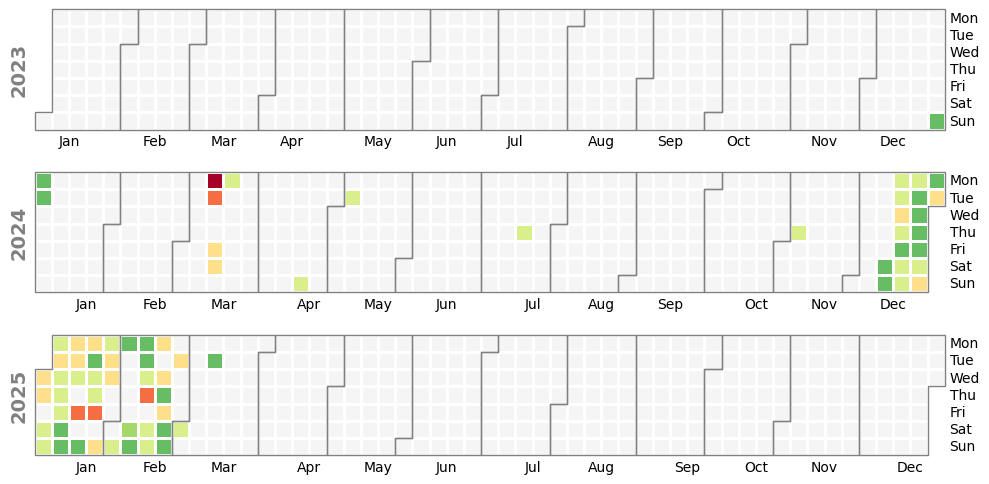

In [38]:
df.show_calendar_plot()

Of course, we can also subset the dataset to, say, take a look at a particular activity

In [ ]:
# when I was at home (some of my trips are clearly visible)
df.sub(A("home")).show_calendar_plot()

In [ ]:
# when I played factorio alone
df.sub(A("factorio") & ~A.people()).show_calendar_plot()

In [ ]:
# when I studied not at home
df.sub(A("study") & ~A("home")).show_calendar_plot()

In [ ]:
# bad-to-meh mood?
df.sub(MoodInterval(1, 3.1)).show_calendar_plot()

## Entries times differences

In [ ]:
df.sub(A("home")).stats()

In [ ]:
df.sub(A("home")).entries_differences()

## Monthly activity effect on mood

In [40]:
df.mood_change_activity("climbing")

No 'climbing' in December 2023, January 2024, April 2024, May 2024, July 2024, November 2024, March 2025


In [41]:
df.mood_change_activity("doomscrolling")

No 'doomscrolling' in December 2023, January 2024, April 2024, May 2024, July 2024, November 2024


In [42]:
df.mood_change_activity("programming")

No 'programming' in December 2023, January 2024, March 2024, April 2024, May 2024, July 2024, November 2024, March 2025


In [49]:
df.mood_change_activity("day off")

No 'day off' in December 2023, January 2024, March 2024, April 2024, May 2024, July 2024, November 2024, December 2024, March 2025


In [43]:
df.mood_change_activity("time together")

No 'time together' in December 2023, January 2024, March 2024, April 2024, May 2024, July 2024, November 2024, December 2024, March 2025


In [46]:
df.mood_change_activity("read book")

No 'read book' in December 2023, January 2024, March 2024, April 2024, May 2024, July 2024, November 2024, March 2025


## Other features

In [47]:
df.people_frequency()

In [48]:
df.note_length_plot()

In [37]:
select_activities_df = df.sub(include={"biking", "sick", "meditate", "sauna", "movies & tv", "read book", "gaming", "programming", "doomscrolling", "Audiobook/Podcast", "listen to music", "Cinema", "Youtube", "climbing", "swimming"})
select_activities_df.generate_activity_correlation_matrix()

# Monthly Report Templates

In [33]:
from src.monthly_report import generate_report_template


generate_report_template(1, 2025, df)


file 2025-01.md already exists


# Other